In [ ]:
#Directorios
import os
import numpy as np

# Librerias para graficación (trazado de gráficos) por si acaso
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Cargar datos
data = np.loadtxt(os.path.join('/content/gdrive/MyDrive/dataset_2p', 'ecoli.csv'), delimiter=",")


In [ ]:
#CREAR X ; Y
x = data[:, :7]
y = data[:, 7]
y_res = data[:,7]
#m = y.size
print(x[0])
print(x.shape)
print(y.shape)

[0.49 0.29 0.48 0.5  0.56 0.24 0.35]
(336, 7)
(336,)


In [ ]:
#Igualdad a 1 para la suma de todos los valores del resultado
def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=-1,keepdims=True)

In [ ]:
def crossentropy(output, target):
    logits = output[np.arange(len(output)),target]
    entropy = - logits + np.log(np.sum(np.exp(output),axis=-1))
    return entropy

def grad_crossentropy(output, target):
    answers = np.zeros_like(output)
    answers[np.arange(len(output)),target] = 1    
    return (- answers + softmax(output)) / output.shape[0]

In [ ]:
class Perceptron():
  def __init__(self, inputs, outputs):
    self.w = np.random.normal(loc=0.0, 
          scale = np.sqrt(2/(inputs+outputs)), 
          size = (inputs, outputs)) 
    self.ws = []
    self.loss = crossentropy
    self.grad_loss = grad_crossentropy
    
  def __call__(self, w, x):
    return np.dot(x, w) 

  def fit(self, x, y, epochs, lr, verbose=True, log_each=1):
    y = y.astype(int)
    
    x = np.c_[np.ones(len(x)), x]
    for epoch in range(1,epochs+1):
        # Batch Gradient Descent
        y_hat = self(self.w, x)  
        # función de pérdida
        l = self.loss(y_hat, y).mean()
        # derivadas
        dldh = self.grad_loss(y_hat, y)
        dhdw = x
        dldw = np.dot(dhdw.T, dldh)
        # actualizar pesos
        self.w = self.w - lr*dldw
        # guardar pesos para animación
        self.ws.append(self.w.copy())
        # print loss
        if verbose and not epoch % log_each:
            print(f"Epoch {epoch}/{epochs} Loss {l}")
            
  def predict(self, x):
    x = np.c_[np.ones(len(x)), x]
    return self(self.w, x)

In [ ]:
#Entrenamiento

perceptron = Perceptron(8, 9)
epochs, lr = 300, 1
perceptron.fit(x, y, epochs, lr, log_each=20)

Epoch 20/300 Loss 1.3935694211754097
Epoch 40/300 Loss 1.1824320450450438
Epoch 60/300 Loss 1.0479505917164327
Epoch 80/300 Loss 0.9538677767517701
Epoch 100/300 Loss 0.8839805499131698
Epoch 120/300 Loss 0.8297120857012882
Epoch 140/300 Loss 0.7861162993765112
Epoch 160/300 Loss 0.750156588311187
Epoch 180/300 Loss 0.719869996703956
Epoch 200/300 Loss 0.6939308186101512
Epoch 220/300 Loss 0.6714096691103664
Epoch 240/300 Loss 0.6516339393709215
Epoch 260/300 Loss 0.6341034543845551
Epoch 280/300 Loss 0.6184375132316872
Epoch 300/300 Loss 0.6043404810818723


In [ ]:
X_mean = [np.mean(x,axis=0)]
X_std = [np.std(x,axis=0)]

#Pruebas
# nuevo punto
X_new = x[0]
X_new_norm = (X_new - X_mean) / X_std 
print(X_new_norm)
# normalizamos
#X_new_norm = (X_new - X_mean) / X_std 
# salida del perceptron
y = perceptron.predict(X_new_norm)
y

[[-0.0517614  -1.41953086 -0.17514236 -0.05463584  0.49078096 -1.20771743
  -0.7160837 ]]


array([[ 1.14588684, 15.20708409, -8.57152879, -4.49772023, -4.26654353,
         1.17157358,  0.74940658, -0.14121439, -1.14113966]])

In [ ]:
y_probas = softmax(y)
print(res)
print(y_probas)

0.6562645054839145
[[7.82165356e-07 9.99997587e-01 4.71062562e-11 2.76892485e-09
  3.48907203e-09 8.02516901e-07 5.26149775e-07 2.15932301e-07
  7.94429909e-08]]


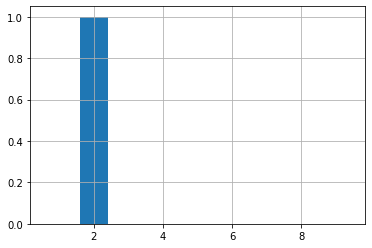

In [ ]:
import matplotlib.pyplot as plt
plt.bar(list(range(1,10)), y_probas[0])
plt.grid(True)
plt.show()

<h2>Metricas<h2>

In [ ]:
y_probas.sum(axis=1)
y_pred = np.argmax(y_probas, axis=1)
y_pred

array([1])

In [ ]:
def evaluate(x):
    x = (x - X_mean) / X_std 
    y = perceptron.predict(x)
    y_probas = softmax(y)
    return np.argmax(y_probas, axis=1)

In [ ]:
X = x[:]
pred = evaluate(X)
print(pred)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2
 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 2 2 4 6 1 5
 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 3 2 1 1 1 3 2 2 3 2
 1 6 4 4 4 4 4 4 4 4 4 4 2 3 4 4 4 2 2 2 4 4 4 2 4 2 4 4 4 6 4 4 2 4 4 1 4
 5 5 5 3 5 3 5 5 5 5 5 5 5 5 5 6 5 5 5 5 6 6 6 6 6 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 1 3 1 3 5 1 3 3
 3 3 3]


In [ ]:
y_res = y_res.astype(int)
print(y_res.astype(int))
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y_res) * 100))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 8 8
 7 7 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]
Precision del conjuto de entrenamiento: 86.31%
